# Stock Market Data Analysis with Python

**Basics for handling and analyzing stock market data**

# 1. Creating list of stocks

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import seaborn as sns

sns.set_context("notebook")

## We will only consider 100 stocks based on NIFTY 50 and NIFTY Next 50
[Source](https://en.wikipedia.org/wiki/NIFTY_50)

* NIFTY 50 index is National Stock Exchange of India's benchmark broad based stock market index for the Indian equity market. It represents the weighted average of 50 Indian company stocks in 12 sectors and is one of the two main stock indices used in India, the other being the BSE sensex
* NIFTY Next 50, also called NIFTY Junior, is an index of 50 companies whose free float market capitalization comes after that of the companies in NIFTY 50. NIFTY Next 50 constituents are thus potential candidates for future inclusion in NIFTY 50

In [4]:
# List of 50 companies that form part of NIFTY 50 Index as in April 2018
nifty_50 = pd.read_table('data/nifty_50.csv', sep='\t')
nifty_50['Type'] = 'NIFTY 50'

nifty_next_50 = pd.read_table('data/nifty_next_50.csv', sep='\t')
nifty_next_50['Type'] = 'NIFTY Next 50'

# Concat these 2 dataframes 
frames = [nifty_50, nifty_next_50]

df = pd.concat(frames)
df = df.reset_index(drop=True)
df['Ticks'] = 'NSE/'+df['Symbol']+'.5' # Col 5 is closing value of stock
df.head(3)

,Company Name,Symbol,Sector,Type,Ticks
0,Bajaj Auto,BAJAJ-AUTO,Automobile,NIFTY 50,NSE/BAJAJ-AUTO.5
1,Eicher Motors,EICHERMOT,Automobile,NIFTY 50,NSE/EICHERMOT.5
2,Hero MotoCorp,HEROMOTOCO,Automobile,NIFTY 50,NSE/HEROMOTOCO.5


In [5]:
df.shape

(99, 5)

Now we have a table of 99 stocks. This will be our anaalysis subset

## 2. Getting Stock Data
Getting Data from **[Quandl](https://github.com/quandl/quandl-python)**. 

In [6]:
stocks = list(df.Ticks)
stocks[0:5]

['NSE/BAJAJ-AUTO.5',
 'NSE/EICHERMOT.5',
 'NSE/HEROMOTOCO.5',
 'NSE/M&M.5',
 'NSE/MARUTI.5']

In [7]:
# https://docs.quandl.com/v1.0/docs/python-installation#section-authentication
data = quandl.get(stocks, start_date="2015-01-01", authtoken="HALLO")

In [8]:
# data not found 
[s for s in data.columns if "Not Found" in s]

# Check tickers for these

['NSE/BAJAJ-AUTO - Not Found',
 'NSE/M&M - Not Found',
 'NSE/CUMMINS - Not Found',
 'NSE/EMAMI - Not Found',
 'NSE/L&TFH - Not Found',
 'NSE/MCDOWELL-N - Not Found']

In [9]:
data.columns = df.Symbol.copy()
data.tail()

Symbol,BAJAJ-AUTO,EICHERMOT,HEROMOTOCO,M&M,MARUTI,TATAMOTORS,AXISBANK,HDFCBANK,ICICIBANK,INDUSINDBK,...,PGHH,PNB,RECLTD,SAIL,SBILIFE,SHREECEM,SRTRANSFIN,SIEMENS,SUNTV,MCDOWELL-N
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-05,NaN,27888.0,3505.75,NaN,9347.05,261.55,511.00,2123.75,271.55,1964.45,...,9944.10,75.55,99.80,78.60,665.10,16433.90,1152.1,971.70,770.80,NaN
2018-07-06,NaN,27626.3,3637.10,NaN,9317.50,270.85,513.70,2115.15,270.05,1959.40,...,9954.90,76.95,104.30,80.45,668.05,16201.45,1111.8,976.30,794.10,NaN
2018-07-09,NaN,27632.5,3611.50,NaN,9374.90,273.50,525.25,2125.65,271.20,1958.30,...,10047.15,77.80,103.05,81.55,664.85,16589.25,1140.9,990.10,812.90,NaN
2018-07-10,NaN,28289.0,3583.50,NaN,9531.00,275.45,532.55,2146.40,273.40,1935.10,...,10168.00,77.85,103.65,81.15,661.35,16804.80,1206.1,1015.75,809.35,NaN
2018-07-11,NaN,28160.5,3536.60,NaN,9384.70,267.80,536.55,2148.25,268.75,1914.80,...,10319.55,75.55,101.35,77.40,662.10,16936.85,1206.0,997.55,800.30,NaN


In [14]:
# Save the data 
data.to_csv('./data/nifty_100.csv', sep=';')

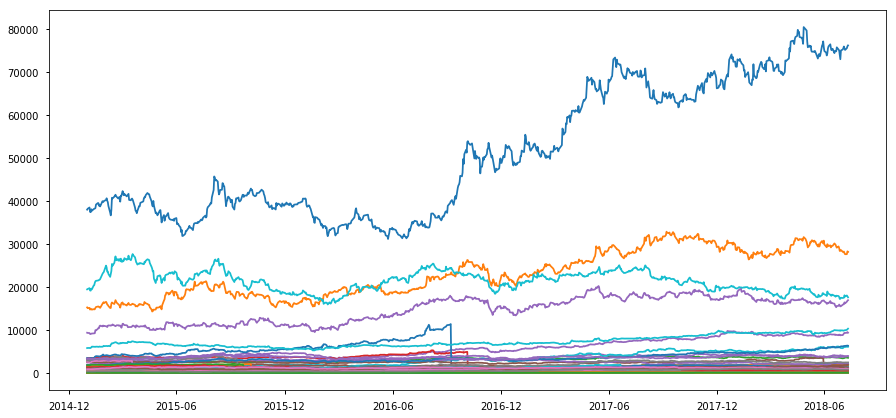

In [10]:
plt.figure(figsize=(15,7))

plt.plot(data);

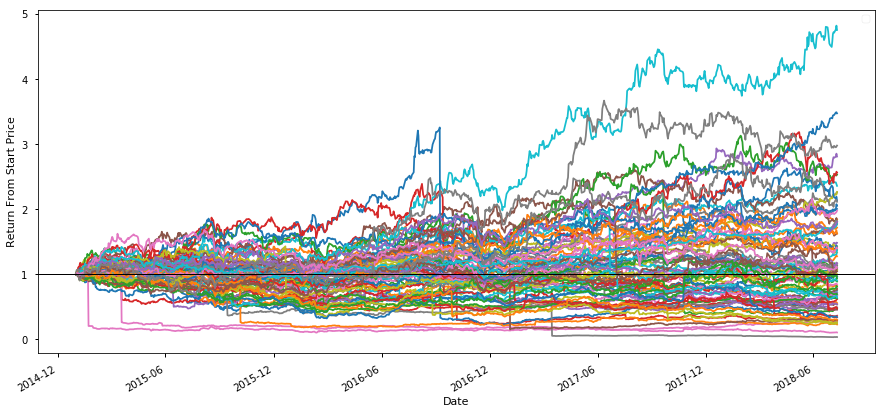

In [11]:
returnfstart = data.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(15,7)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')
plt.legend('');

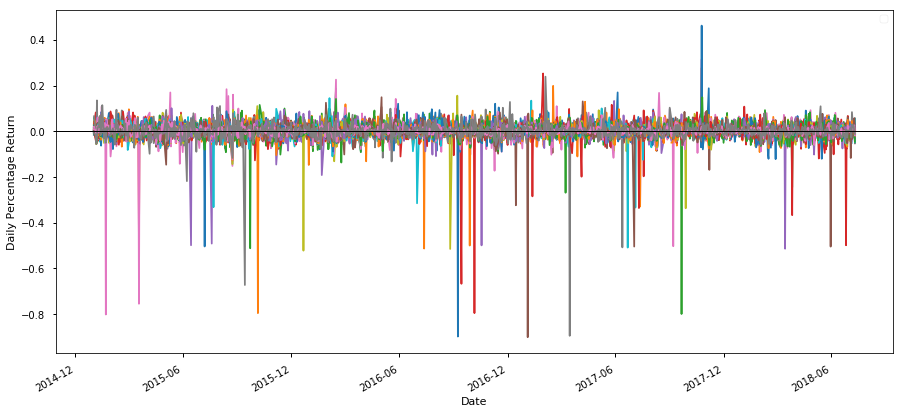

In [12]:
df2=data.pct_change()
 
df2.plot(figsize=(15,7))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return')
plt.legend('');